C:\Users\HP\AppData\Local\Temp\ipykernel_9956\1917672113.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_extracted["Runs Scored"].fillna(0, inplace=True)


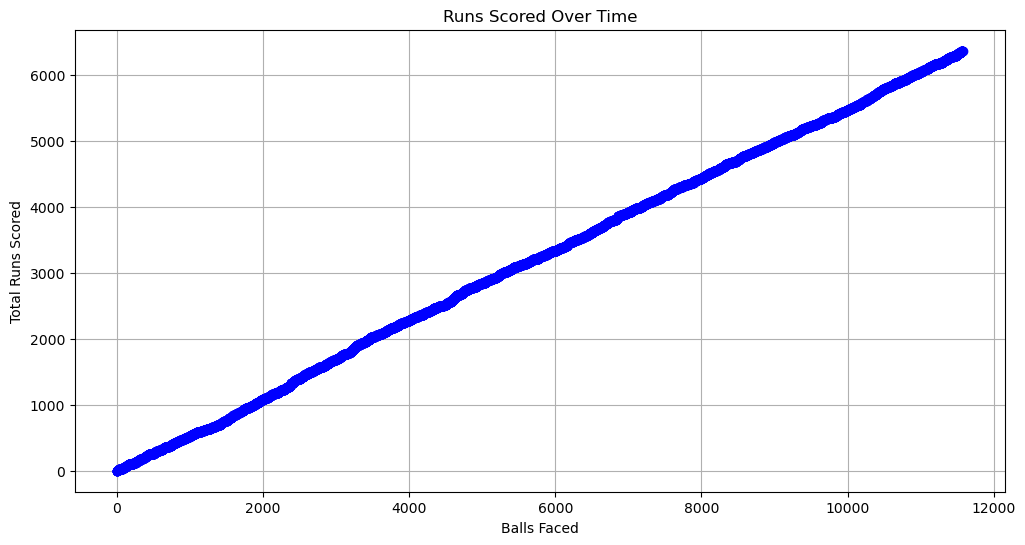

   Match_id          Team  Over_num  \
0   4281444  RCB 1st Inns       0.5   
1   4281444  RCB 1st Inns       1.0   
2   4281444  RCB 1st Inns      10.0   
3   4281444  RCB 1st Inns      10.4   
4   4281444  RCB 1st Inns      10.5   

                                          Commentary  \
0  Nehra to Mandeep, FOUR, first boundary for Man...   
1  Nehra to Mandeep, FOUR, back-to-back boundarie...   
2  Henriques to Kedar Jadhav, FOUR, hit straight ...   
3  Nehra to Kedar Jadhav, FOUR, another full toss...   
4  Nehra to Kedar Jadhav, FOUR, four more. Jadhav...   

                     batsman score Bowler     Batter  Ball Type Shot Type  \
0           Nehra to Mandeep  FOUR   None      Nehra       None  boundary   
1           Nehra to Mandeep  FOUR   None      Nehra       None      None   
2  Henriques to Kedar Jadhav  FOUR   None  Henriques       None      None   
3      Nehra to Kedar Jadhav  FOUR   None      Nehra  full toss      None   
4      Nehra to Kedar Jadhav  FOUR   None  

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
file_path = "IPL_Match_Highlights_Commentary.csv"
df = pd.read_csv(file_path)

# Extract relevant columns
def extract_info(commentary):
    bowler = re.findall(r'bowled by (\w+)', commentary)
    batter = re.findall(r'\b(\w+) to', commentary)
    ball_type = re.findall(r'\b(yorker|bouncer|full toss|good length)\b', commentary)
    shot_type = re.findall(r'\b(boundary|single|double|four|six)\b', commentary)
    speed = re.findall(r'(\d{2,3})\s?kmph', commentary)
    runs = re.findall(r'\b(0|1|2|3|4|6)\b', commentary)
    
    return {
        "Bowler": bowler[0] if bowler else None,
        "Batter": batter[0] if batter else None,
        "Ball Type": ball_type[0] if ball_type else None,
        "Shot Type": shot_type[0] if shot_type else None,
        "Speed (kmph)": int(speed[0]) if speed else None,
        "Runs Scored": int(runs[0]) if runs else None,
    }

# Apply extraction
details_df = df["Commentary"].dropna().apply(extract_info).apply(pd.Series)

# Merge with original data
df_extracted = pd.concat([df, details_df], axis=1)

# Plot Runs Over Time
plt.figure(figsize=(12, 6))
df_extracted["Runs Scored"].fillna(0, inplace=True)
df_extracted["Cumulative Runs"] = df_extracted["Runs Scored"].cumsum()
plt.plot(df_extracted.index, df_extracted["Cumulative Runs"], marker='o', linestyle='-', color='b')
plt.xlabel("Balls Faced")
plt.ylabel("Total Runs Scored")
plt.title("Runs Scored Over Time")
plt.grid()
plt.show()

# Show first few rows
print(df_extracted.head())